In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
nifty50 = yf.Ticker('^NSEI')
nifty50_data = nifty50.history(period='10y')
nifty50_data.reset_index(inplace=True)
nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'])

Closing price Vs Time

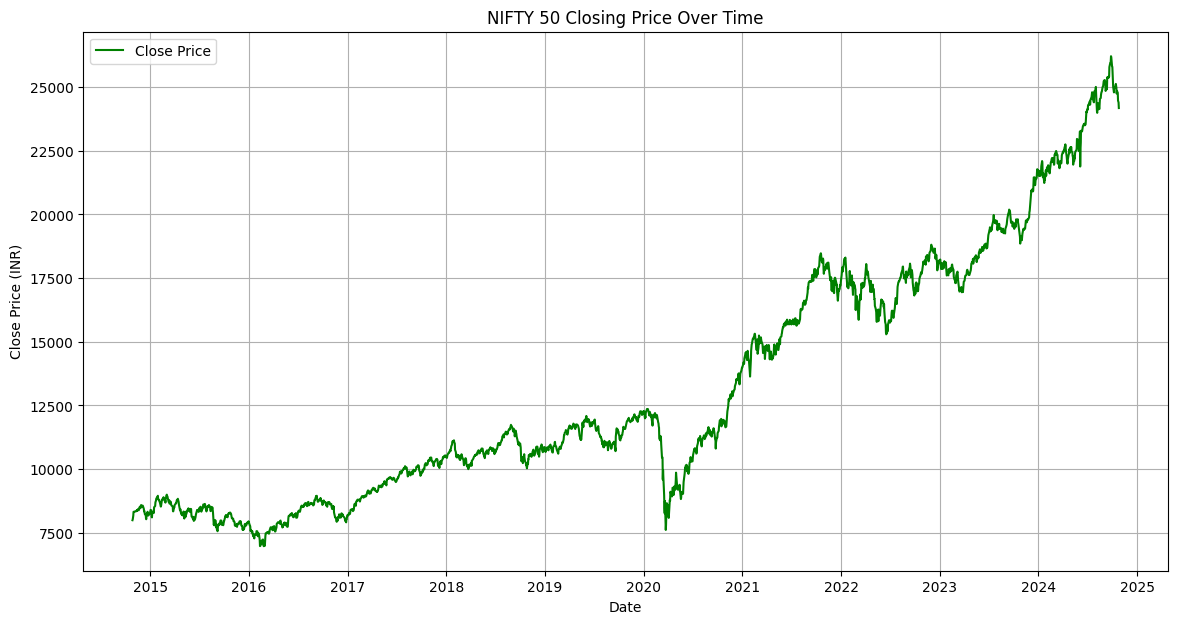

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(nifty50_data['Date'], nifty50_data['Close'], label='Close Price', color='green')
plt.title("NIFTY 50 Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

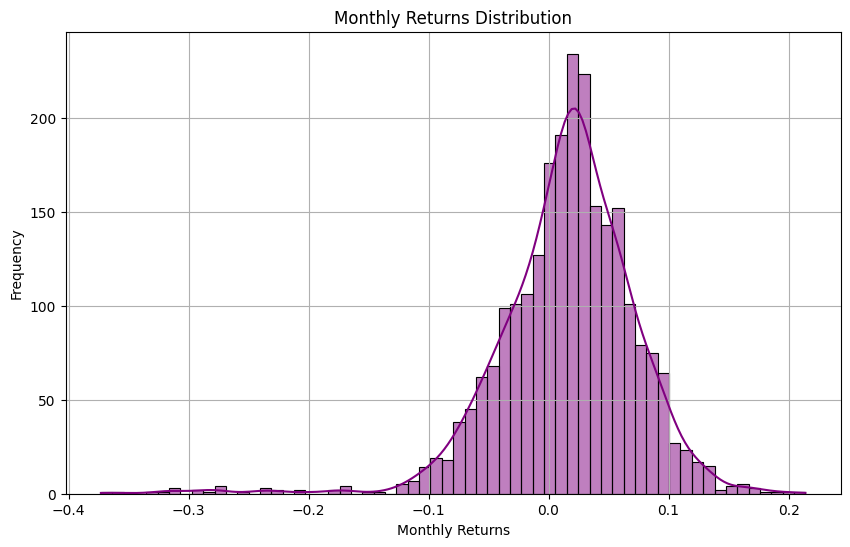

In [8]:
#Monthly Returns Distribution

# Calculate monthly returns
nifty50_data['Monthly_Returns'] = nifty50_data['Close'].pct_change(periods=30)

plt.figure(figsize=(10, 6))
sns.histplot(nifty50_data['Monthly_Returns'].dropna(), kde=True, color='purple')
plt.title("Monthly Returns Distribution")
plt.xlabel("Monthly Returns")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

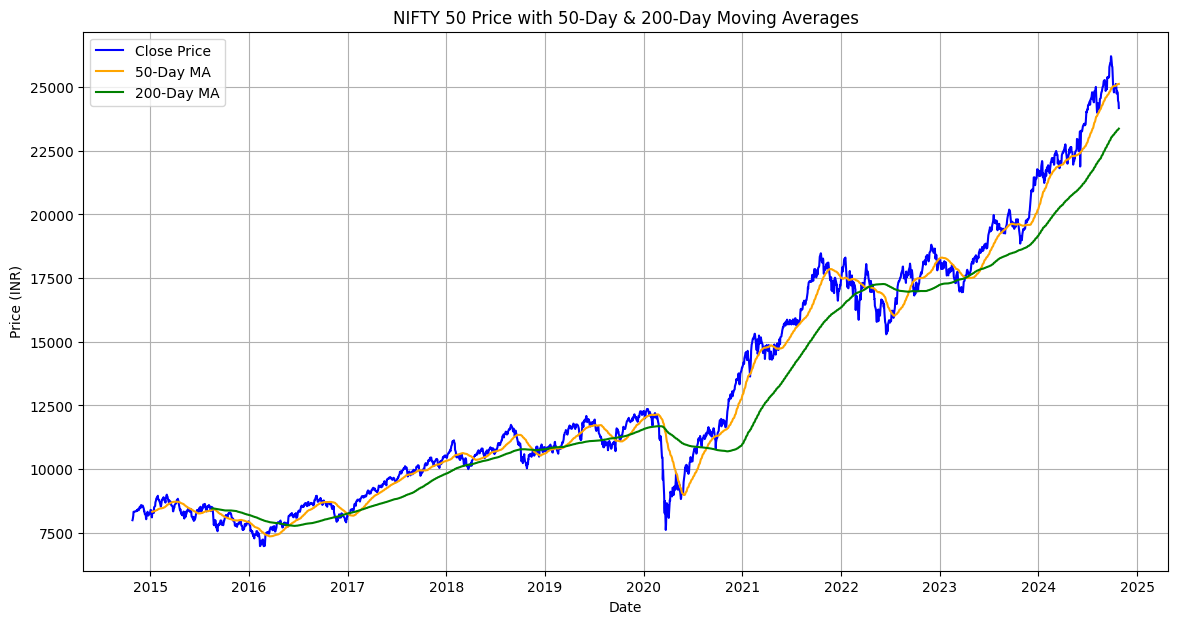

In [9]:
# Moving Average
nifty50_data['50_MA'] = nifty50_data['Close'].rolling(window=50).mean()
nifty50_data['200_MA'] = nifty50_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(nifty50_data['Date'], nifty50_data['Close'], label='Close Price', color='blue')
plt.plot(nifty50_data['Date'], nifty50_data['50_MA'], label='50-Day MA', color='orange')
plt.plot(nifty50_data['Date'], nifty50_data['200_MA'], label='200-Day MA', color='green')
plt.title("NIFTY 50 Price with 50-Day & 200-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

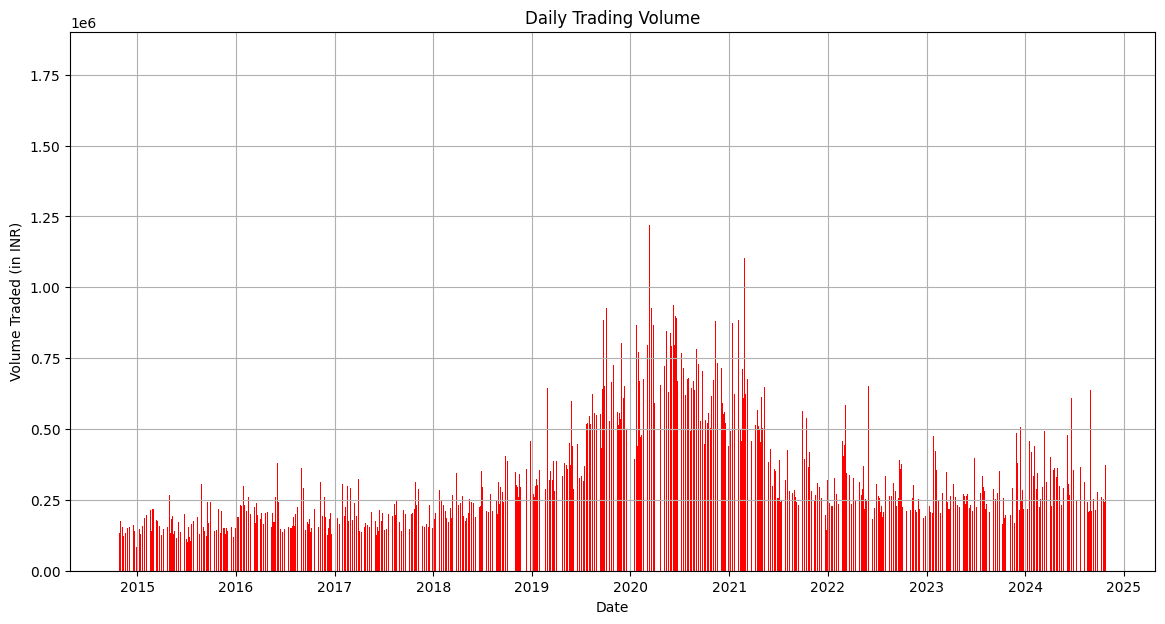

In [10]:
#volume traded vs time

plt.figure(figsize=(14, 7))
plt.bar(nifty50_data['Date'], nifty50_data['Volume'], color='red')
plt.title("Daily Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume Traded (in INR)")
plt.grid(True)
plt.show()

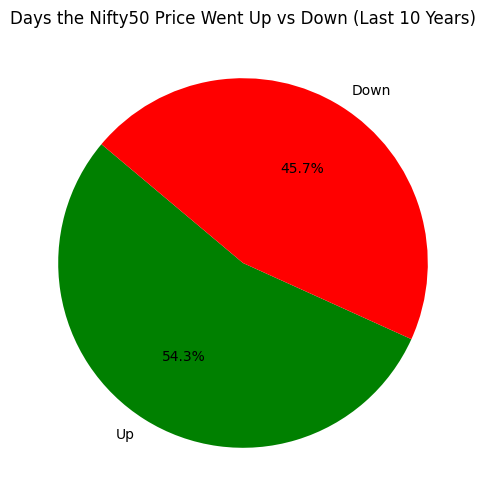

In [12]:
nifty50_data['Price_Movement'] = nifty50_data['Close'].diff().apply(lambda x: 'Up' if x > 0 else 'Down')

# Counting the occurrences of 'Up' and 'Down'
movement_counts = nifty50_data['Price_Movement'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(movement_counts, labels=movement_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title("Days the Nifty50 Price Went Up vs Down (Last 10 Years)")
plt.show()

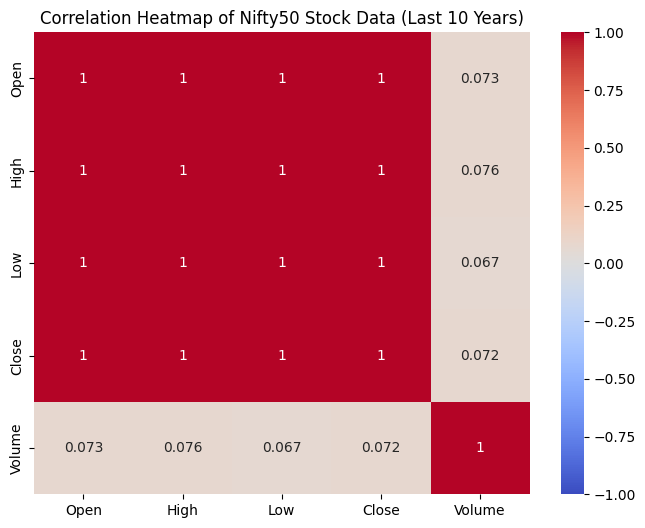

In [13]:
nifty50_data.reset_index(inplace=True)

# Selecting only numerical columns (e.g., Open, High, Low, Close, Volume)
numeric_data = nifty50_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Nifty50 Stock Data (Last 10 Years)")
plt.show()

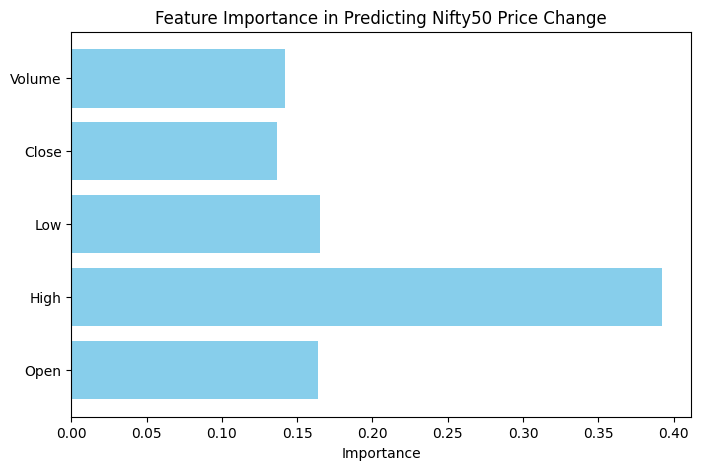

In [14]:
import joblib

# Load the pre-trained regressor
regressor = joblib.load('D:\coding\python\Projects\Boards\src\price_change_predictor.pkl')

# Get the list of predictors used
Predictors = ['Open', 'High', 'Low', 'Close', 'Volume']

# Extract feature importances from the model
importances = regressor.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(Predictors, importances, color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance in Predicting Nifty50 Price Change")
plt.show()